# setup

In [9]:
import pandas as pd
import numpy as np
import ipaddress
import dns.resolver
import dns.reversename
import pygeoip
import matplotlib.pyplot as plt 

In [10]:
datafile='data7.parquet'
testfile='servers7.parquet'
serverfile='test7.parquet'


In [11]:

gi=pygeoip.GeoIP('./GeoIP.dat')
gi2=pygeoip.GeoIP('./GeoIPASNum.dat')
addr='193.136.73.21'
cc=gi.country_code_by_addr(addr)
org=gi2.org_by_addr(addr)
print(cc,org)

PT AS1930 Fundacao para a Ciencia e a Tecnologia, I.P.


In [12]:
pd_data=pd.read_parquet(datafile)
pd_test=pd.read_parquet(testfile)
pd_servers=pd.read_parquet(serverfile)


In [13]:

#Just the UDP flows
udpF=pd_data.loc[pd_data['proto']=='udp']

#Number of UDP flows for each source IP
nudpF=pd_data.loc[pd_data['proto']=='udp'].groupby(['src_ip'])['up_bytes'].count()

#Just the tcp flows
tcpF=pd_data.loc[pd_data['proto']=='tcp']

#Number of tcp flows for each source IP
ntcpF=pd_data.loc[pd_data['proto']=='tcp'].groupby(['src_ip'])['up_bytes'].count()

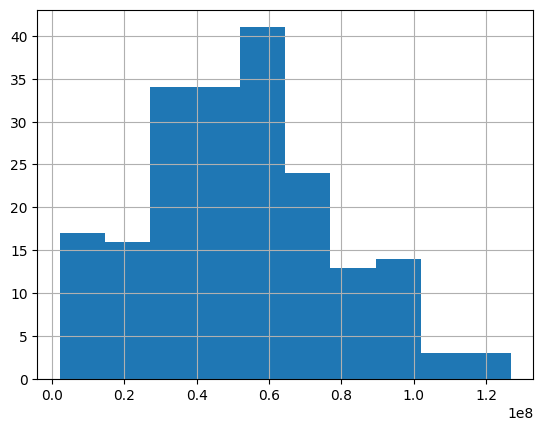

In [14]:
#Number of UDP flows to port 443, for each source IP
nudpF443=pd_data.loc[(pd_data['proto']=='udp')&(pd_data['port']==443)].groupby(['src_ip'])['up_bytes'].count()

#Average number of downloaded bytes, per flow, for each source IP
avgUp=pd_data.groupby(['src_ip'])['down_bytes'].mean()


#Total uploaded bytes to destination port 443, for each source IP, ordered from larger amount to lowest amount
upS=pd_data.loc[((pd_data['port']==443))].groupby(['src_ip'])['up_bytes'].sum().sort_values(ascending=False)

#Histogram of the total uploaded bytes to destination port 443, by source IP
upS=pd_data.loc[((pd_data['port']==443))].groupby(['src_ip'])['up_bytes'].sum().hist()
plt.show()

#Upload/Download byt

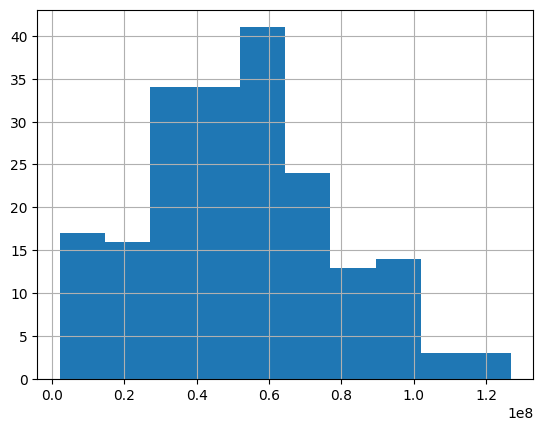

In [16]:
#Number of UDP flows to port 443, for each source IP
ntcpF443=pd_data.loc[(pd_data['proto']=='tcp')&((pd_data['port']==443)|(pd_data['port']==80))].groupby(['src_ip'])['up_bytes'].count()

#Average number of downloaded bytes, per flow, for each source IP
avgUp=pd_data.groupby(['src_ip'])['down_bytes'].mean()


#Total uploaded bytes to destination port 443, for each source IP, ordered from larger amount to lowest amount
upS=pd_data.loc[((pd_data['port']==443))].groupby(['src_ip'])['up_bytes'].sum().sort_values(ascending=False)

#Histogram of the total uploaded bytes to destination port 443, by source IP
upS=pd_data.loc[((pd_data['port']==443))].groupby(['src_ip'])['up_bytes'].sum().hist()
plt.show()

#Upload/Download byt

src_ip
192.168.107.100    2172
192.168.107.101    4958
192.168.107.102    1174
192.168.107.103    4873
192.168.107.104    6353
Name: up_bytes, dtype: int64

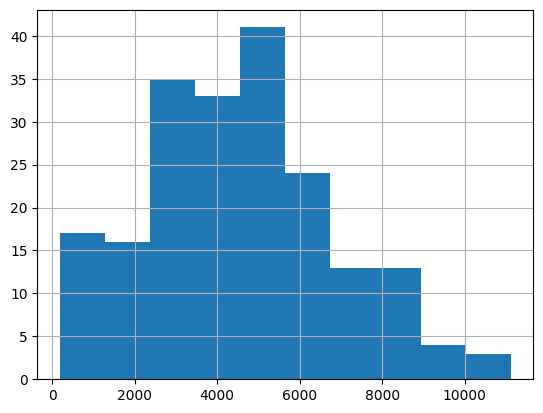

In [18]:
ntcpF443.hist()
ntcpF443.head()